In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sci
from scipy import optimize
import time as ti

# Offline Stage


In [2]:

#Hello world
# Create second derivative matrix
def hf_sec_der(xgrid):
    N = len(xgrid)
    dx = xgrid[1] - xgrid[0]

    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 / 2 / dx**2)
    off_diag = np.ones(N - 1) * 4 / 3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))

    # Matrix chart

    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(
      off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)

    return D2


In [3]:


# Create potential matrix
def hf_pot(xgrid):
      return np.diag(xgrid**2)


In [4]:


# Combine into big hamiltonian
def hf_sol(xgrid, alpha):
    d0 = hf_sec_der(xgrid)
    v = hf_pot(xgrid)
    H = -d0 + alpha * v
    return H


In [5]:
def getExactLambda(alpha):
  n = 0
  return 2 * (.5 + n) * np.sqrt(alpha / 1**2)

In [6]:

x_max = 10.0
h = 10**(-1)
x = np.arange(-x_max, x_max + h, h)
N_grid = x.shape[0]
# alphas = [.5, 5, 10, 15]
alphas = np.arange(0.5, 15.5, 0.5)
m = np.zeros((len(alphas), N_grid))


In [7]:
def timing(H, int):
  solveTime = []
  for i in range(int):
    time0 = time.time()
    evals, evects = np.linalg.eigh(H)
    time1 = time.time()
  solveTime.append(time1-time0)
  avg = sum(solveTime)/len(solveTime)
  return avg
  

# I made a change
def HO_solver(H):
  evals, evects = np.linalg.eigh(H)
  solveTime = timing(H, 10)
  return evals, evects, solveTime


In [8]:
def create_functions(h):
  x_max = 10.0 
  x = np.arange(-x_max, x_max + h, h)
  D20 = hf_sec_der(x)
  V0 = hf_pot(x)
  return D20, V0


In [9]:

def HO_creator(alpha, D2Mat, vpot):
  return -D2Mat + alpha * vpot

In [10]:

h_list = [1/10, 1/20, 1/30]

htimes = []
herrors = []

i = 0
for h in h_list:
  D20, V0 = create_functions(h)
  for alpha in range(5, 105, 5):
    alpha = alpha/10
    
    # Used for error estimation
    exactEigenvalue = getExactLambda(alpha)
    
    H= HO_creator(alpha, D20, V0)
    evals, evects, t1me = HO_solver(H)
    print('Time: %.3e s'%t1me)
  
    err = abs(((evals[0]-exactEigenvalue)/exactEigenvalue))
    print('Relative error: %.3e'%err)
  
    htimes.append(t1me)
    herrors.append(err)


Time: 1.647e-02 s
Relative error: 1.039e-06
Time: 3.332e-02 s
Relative error: 2.077e-06
Time: 1.599e-02 s
Relative error: 3.113e-06
Time: 1.705e-02 s
Relative error: 4.148e-06
Time: 3.093e-02 s
Relative error: 5.183e-06
Time: 4.406e-02 s
Relative error: 6.217e-06
Time: 1.612e-02 s
Relative error: 7.250e-06
Time: 1.936e-02 s
Relative error: 8.282e-06
Time: 1.492e-02 s
Relative error: 9.314e-06
Time: 8.789e-03 s
Relative error: 1.035e-05
Time: 1.939e-02 s
Relative error: 1.138e-05
Time: 1.133e-02 s
Relative error: 1.241e-05
Time: 1.256e-02 s
Relative error: 1.344e-05
Time: 8.905e-03 s
Relative error: 1.447e-05
Time: 2.631e-02 s
Relative error: 1.549e-05
Time: 9.234e-03 s
Relative error: 1.652e-05
Time: 7.994e-03 s
Relative error: 1.755e-05
Time: 3.304e-02 s
Relative error: 1.858e-05
Time: 1.083e-02 s
Relative error: 1.961e-05
Time: 2.986e-02 s
Relative error: 2.063e-05
Time: 5.051e-02 s
Relative error: 6.507e-08
Time: 6.162e-02 s
Relative error: 1.301e-07
Time: 3.883e-02 s
Relative error

In [11]:

for i in range(len(alphas)):
    alpha_value = alphas[i]
    solutions_np = np.linalg.eigh(hf_sol(x, alpha_value))
    evals =  solutions_np[0]
    evects= solutions_np[1].T
    m[i] = evects[0] / np.linalg.norm(evects[0])*np.sign(evects[0][  int(len(x)/2)  ])
#     print("M")
#     print(m[i])


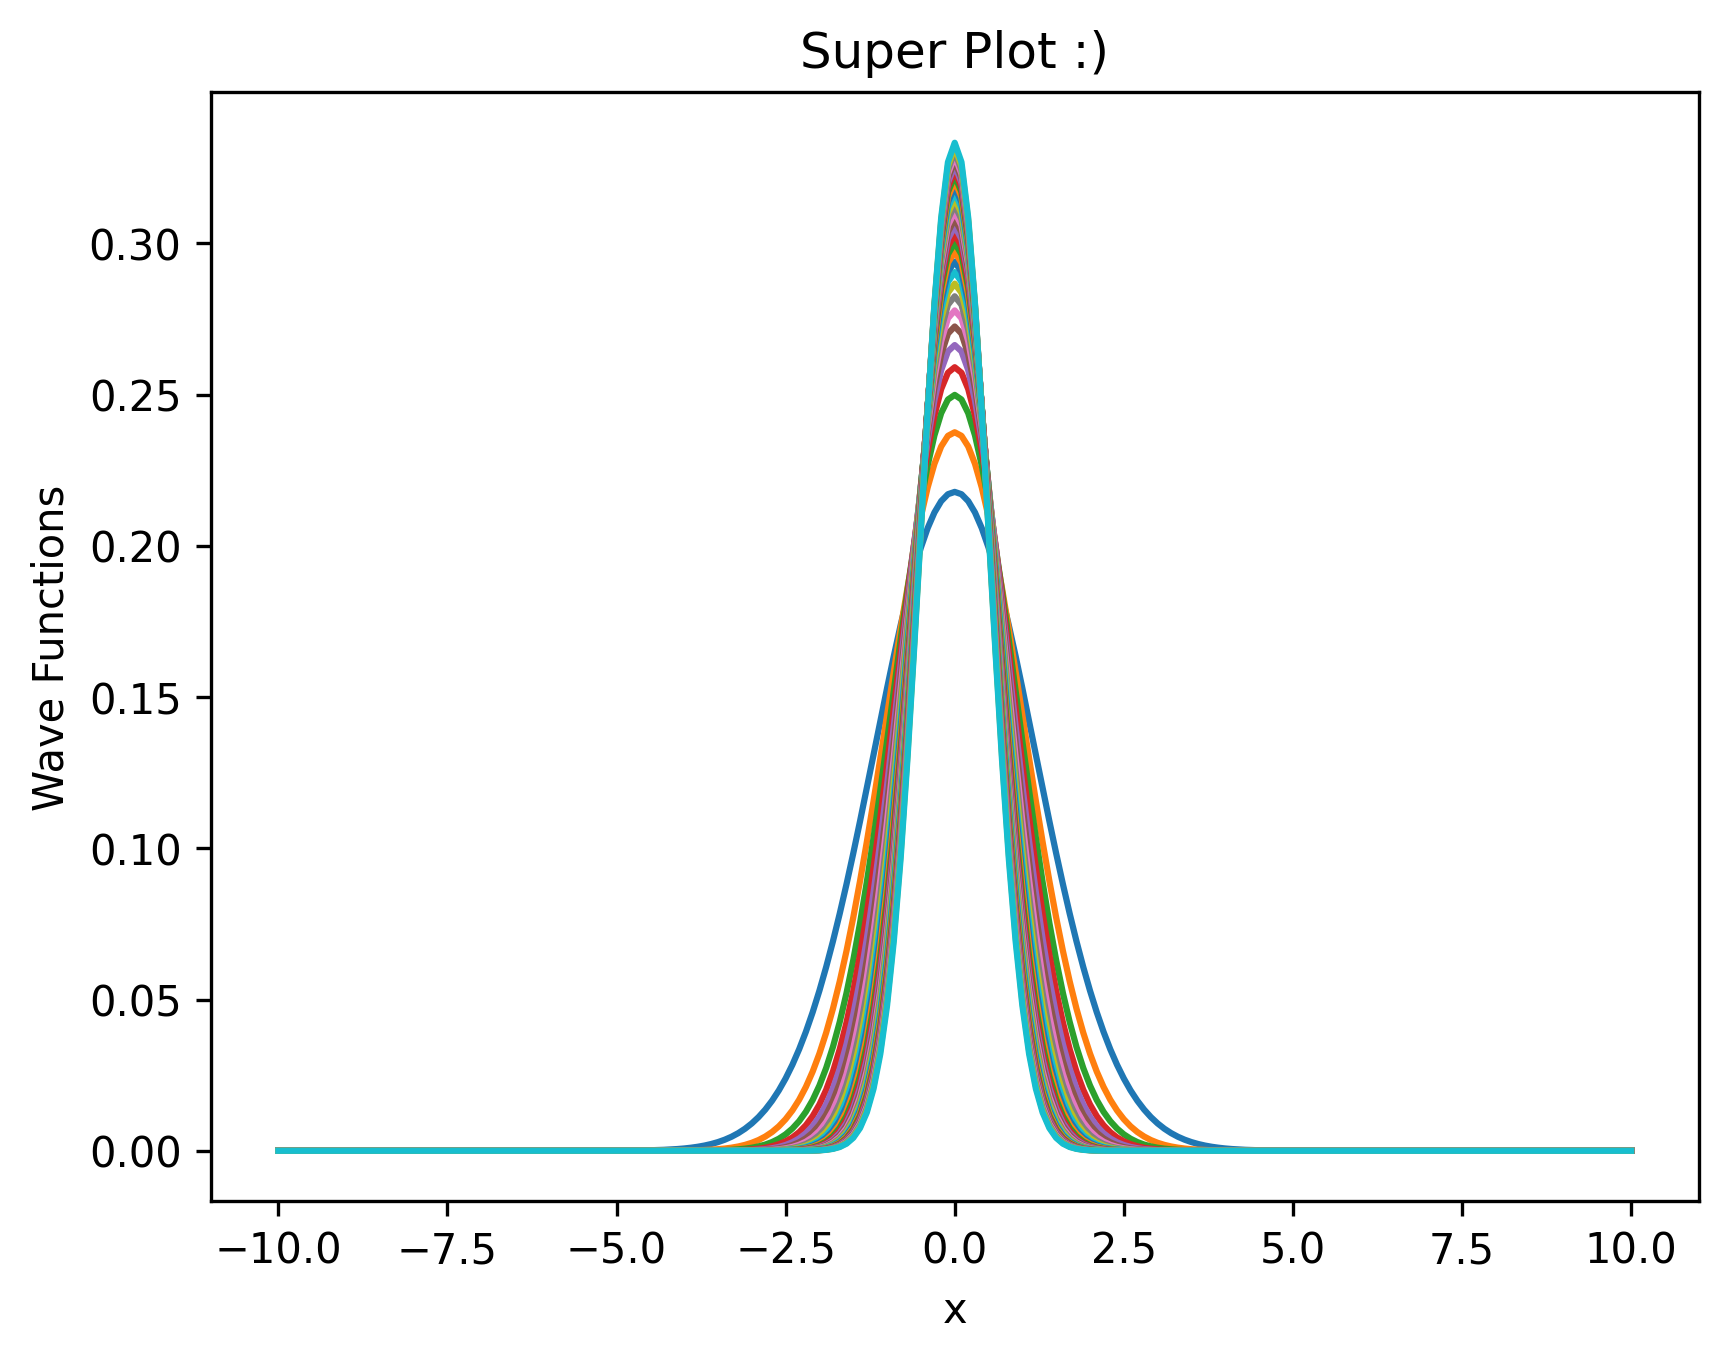

In [12]:
fig, ax = plt.subplots(dpi=300)


for i in range(len(m)):
    # Plot data on the axis
    ax.plot(x, m[i], )

# Add title and labels
ax.set_title("Super Plot :)")
ax.set_xlabel("x")
ax.set_ylabel("Wave Functions")



# Show the plot
plt.show()

In [13]:
# Get rbm coordinates
U, sigma, Vh = np.linalg.svd(m)
components = 3
reduced_basis = Vh[:components]

reduced_basis = [reduced_basis[i]*np.sign(reduced_basis[i][  int(len(x)/2)  ]) for i in range(len(reduced_basis))]

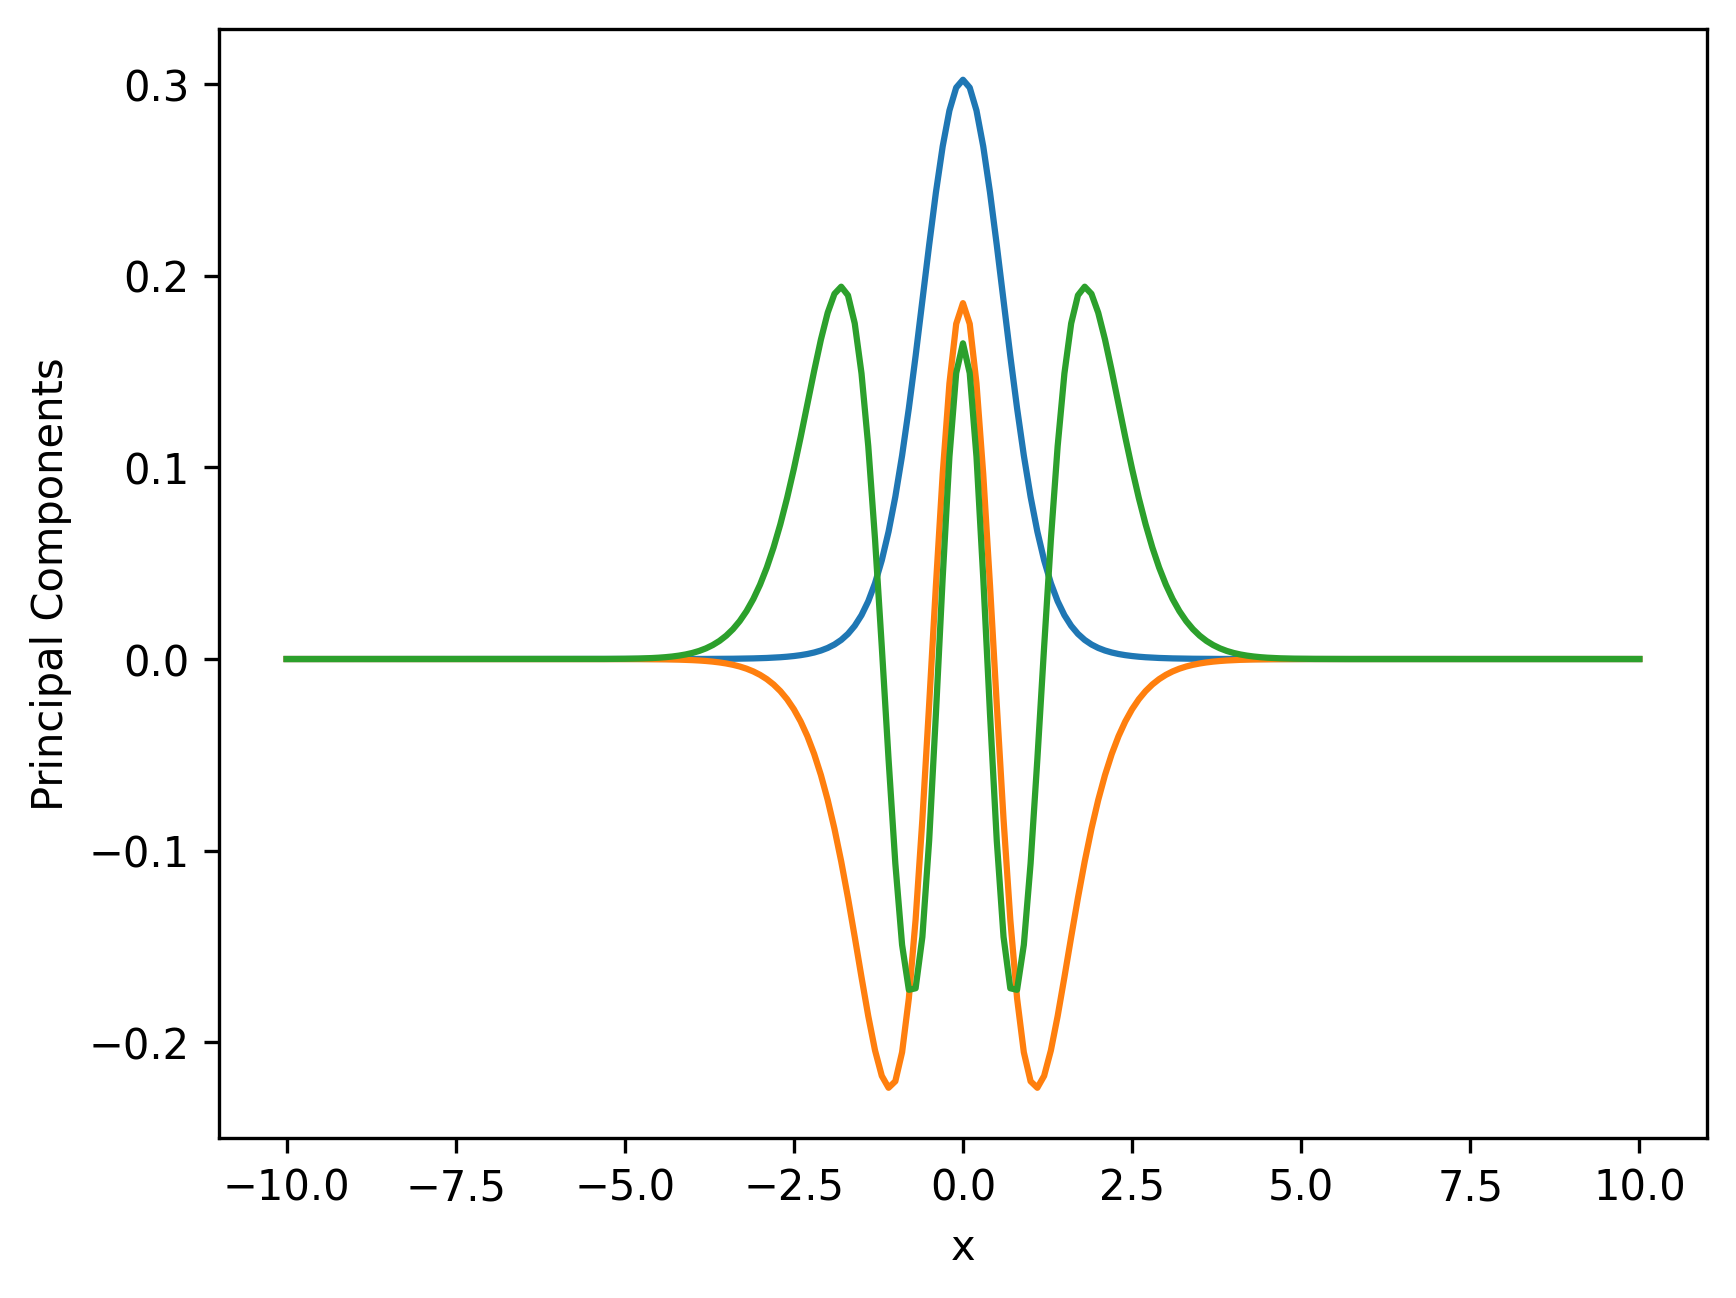

In [14]:
fig, ax = plt.subplots(dpi=300)


for i in range(len(reduced_basis)):
    # Plot data on the axis
    ax.plot(x, reduced_basis[i], )

# Add title and labels

ax.set_xlabel("x")
ax.set_ylabel("Principal Components")



# Show the plot
plt.show()

In [15]:

def getSystem(H, psi_array, phi_array):
  def system(a_vec):
    results = np.zeros(len(a_vec))
    results[-1] = -1  # from normalization
    for i in np.arange(0, len(a_vec) - 1, 1):
          for k in np.arange(0, len(a_vec) - 1, 1):
            results[i] += a_vec[k]*np.dot(psi_array[i],np.matmul(H,phi_array[k])) - \
            a_vec[-1]*a_vec[k]*np.dot(psi_array[i],phi_array[k])
    for k in np.arange(0, len(a_vec) - 1, 1):
          for kp in np.arange(0, len(a_vec) - 1, 1):
            results[-1] += a_vec[kp] * a_vec[k] * np.dot(psi_array[kp],
                                                         phi_array[k])
    return results
  

  return system


In [16]:
mass = 1.0
h = 10**(-1) 
l = np.zeros(len(alphas)+1)
l[0] = 1

In [17]:
print(l)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [18]:
def RBM(alpha_k):
  V = alpha_k * x**2
  dim = len(x)
  off_diag = np.zeros(dim)
  off_diag[1] = 1
  psi = m.copy()
  
  H = -1 * (-2 * np.identity(dim) + sci.linalg.toeplitz(off_diag)) / (mass * h**2) + np.diag(V)
  rbm_sol = np.zeros(len(H))
  # print("H" + str(H))

  time1 = ti.time()
  # Get system/coefficients 

  system = getSystem(H, psi, m)
  coefficients = sci.optimize.fsolve(system, l)
  time2 = ti.time()
  # Get time
  timeDif = time2-time1
  
  # Add all coefficients multiplied by the chosen basis functions
  for i in range(len(coefficients) - 1):
    rbm_sol += coefficients[i] * m[i]
  
  # Get eigenvalue
  print(f'Coeffecients a_k: {coefficients[:len(coefficients)-1]}')
  print(f'Appproximate lambda: {coefficients[-1]}')
  print(f'Exact lambda: {getExactLambda(alpha_k)}')
  print(f'lambda difference: {abs(getExactLambda(alpha_k)-  coefficients[-1])}')
  error = abs(getExactLambda(alpha_k)-  coefficients[-1])
  
  return timeDif, error


In [19]:
alpha_k = 15

In [20]:
V = alpha_k * x**2
dim = len(x)
off_diag = np.zeros(dim)
off_diag[1] = 1
psi = m.copy()


In [21]:

H = -1 * (-2 * np.identity(dim) + sci.linalg.toeplitz(off_diag)) / (mass * h**2) + np.diag(V)
rbm_sol = np.zeros(len(H))
print("H" + str(H))


H[[1700.   -100.      0.   ...    0.      0.      0.  ]
 [-100.   1670.15 -100.   ...    0.      0.      0.  ]
 [   0.   -100.   1640.6  ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... 1640.6  -100.      0.  ]
 [   0.      0.      0.   ... -100.   1670.15 -100.  ]
 [   0.      0.      0.   ...    0.   -100.   1700.  ]]


In [22]:

time1 = ti.time()
# Get system/coefficients 
system = getSystem(H, psi, m)
print(system)


<function getSystem.<locals>.system at 0x7f670869ba30>


In [23]:
coefficients = sci.optimize.fsolve(system, l)
time2 = ti.time()
# Get time
timeDif = time2-time1


/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [24]:

# Add all coefficients multiplied by the chosen basis functions
for i in range(len(coefficients) - 1):
  rbm_sol += coefficients[i] * m[i]
# norm = np.linalg.norm(rbm_sol)


In [25]:

# Get eigenvalue
print(f'Coeffecients a_k: {coefficients[:len(coefficients)-1]}')
print(f'Appproximate lambda: {coefficients[-1]}')
print(f'Exact lambda: {getExactLambda(alpha_k)}')
print(f'lambda difference: {abs(getExactLambda(alpha_k)-  coefficients[-1])}')


Coeffecients a_k: [-5.96242194e-03  1.45975397e-01 -6.60776487e-01 -2.09586695e-01
  4.66490231e+00 -4.19334342e+00 -3.48833340e+00 -1.21184886e-01
  3.84181410e+00  4.66633773e-01  9.83965487e+00 -7.49284793e+00
 -6.73091646e+00  1.53926510e+00  5.72001053e+00 -7.62917885e+00
  1.74128590e+00 -1.95512199e+00  2.04137313e+00  3.51991747e+00
 -3.39719240e-01 -2.17008796e-02  6.98877539e+00 -1.34430224e+00
 -6.84816601e+00  7.04732203e-02 -1.62045560e+00 -3.12668485e+00
  5.14240342e+00  1.06599366e+00]
Appproximate lambda: 3.863585485981332
Exact lambda: 3.872983346207417
lambda difference: 0.009397860226084909


In [26]:

errors = []
times = []

In [27]:
for alpha in range(5, 105, 5):
   alpha = alpha/10
   time, error = RBM(alpha)
   errors.append(error)
   times.append(time)


/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Coeffecients a_k: [ 1.01202224 -0.17573366  0.55946938  0.08448924 -2.18233823  0.75940545
  2.76437813  1.33949345 -4.0700166  -1.03231896  0.47206991  0.2989691
  2.32317345  0.65833925 -2.24063671 -1.37765565  3.1431187  -0.84310064
  0.02365557  0.46335631 -1.10912216 -0.96492701  1.31752857 -0.0118183
 -0.09243312 -1.74212771  0.69936922  0.94134418  1.54912311 -1.56703997]
Appproximate lambda: 0.7067941428951304
Exact lambda: 0.7071067811865476
lambda difference: 0.0003126382914171444
Coeffecients a_k: [ 0.00293102  0.96433721  0.2054587  -0.40816642 -0.28094614  1.27348781
  0.21720401 -1.95097513  0.37650923  0.20903962  1.36470905 -0.73558864
 -0.87619001  0.13882059  0.6629385   0.36972025  1.04227176 -1.84366152
 -1.45393861  2.0748622   0.97950571 -2.56453255 -0.0374311   1.35721469
  1.40986329 -1.72325591  0.47879181 -0.4792251   0.13944342  0.08685403]
Appproximate lambda: 0.9993746086434813
Exact lambda: 1.0
lambda difference: 0.0006253913565187341
Coeffecients a_k: [ 1

In [28]:
print(times)
print(errors)
print(htimes)
print(herrors)

[6.623591899871826, 7.0400495529174805, 10.457993507385254, 7.109897613525391, 3.0848731994628906, 7.295248985290527, 8.925951719284058, 9.699414253234863, 6.619059324264526, 10.590953350067139, 14.74403166770935, 9.282861471176147, 14.398402452468872, 4.698064804077148, 5.4479711055755615, 3.8303515911102295, 5.6898884773254395, 5.484244108200073, 7.6844706535339355, 6.315823078155518]
[0.0003126382914171444, 0.0006253913565187341, 0.0009382192780351684, 0.001251107797462625, 0.001564048690265496, 0.0018770363902655962, 0.002190066769548693, 0.0025031367888252998, 0.002816243818294595, 0.0031293857368157596, 0.003442560832662256, 0.003755767514175723, 0.004069004693635581, 0.0043822706413645385, 0.004695564792593032, 0.00500888610608019, 0.005322233638903828, 0.0056356061025488735, 0.005949004538789104, 0.006262426559090706]
[0.016472339630126953, 0.03332352638244629, 0.01598954200744629, 0.017052412033081055, 0.030926942825317383, 0.044060468673706055, 0.01611638069152832, 0.01936388

In [29]:
maxT = max(htimes) + 10
minT = min(times) - 10
maxEr = max(errors) + 10
minEr = min(herrors) - 10



/tmp/ipykernel_19216/4076224275.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',
/tmp/ipykernel_19216/4076224275.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',


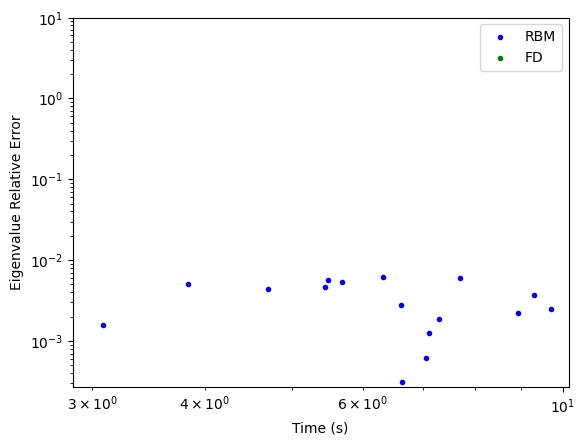

In [30]:
catFig, catAx = plt.subplots()

# Blue is RBM
catAx.scatter(times,errors,color='blue',
               marker='.',label='RBM')

catAx.set(xscale='log',yscale='log',
           xlabel='Time (s)',ylabel='Eigenvalue Relative Error',
           xlim=(minT, maxT),ylim=(minEr,maxEr))
catAx.scatter(htimes,herrors,color='green',
              marker='.',label='FD')

plt.legend()
plt.show()